In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()



In [2]:
data=pd.read_csv('C://Users//aditya//Desktop//LifePY//INTERNSHIP_TASK//DATASET//data.csv')

In [3]:
data.head()

,Unnamed: 0,sno,age,sex,bmi,children,smoker,region,expense
0,0,593,20,male,31.1,2,no,southeast,2566.47
1,1,536,38,male,28.0,1,no,northeast,6067.13
2,2,602,51,male,31.6,0,no,northwest,9174.14
3,3,924,34,male,35.8,0,no,northwest,4320.41
4,4,802,64,female,36.0,0,no,southeast,14313.85


In [4]:
import logging as lg 
lg.basicConfig(filename='test.log' , level = lg.INFO )

In [5]:
lg.info("Data cleaning is about to start")

# DATA EXPLORATION

In [6]:
data.columns

Index(['Unnamed: 0', 'sno', 'age', 'sex', 'bmi', 'children', 'smoker',
       'region', 'expense'],
      dtype='object')

In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.head()

,sno,age,sex,bmi,children,smoker,region,expense
0,593,20,male,31.1,2,no,southeast,2566.47
1,536,38,male,28.0,1,no,northeast,6067.13
2,602,51,male,31.6,0,no,northwest,9174.14
3,924,34,male,35.8,0,no,northwest,4320.41
4,802,64,female,36.0,0,no,southeast,14313.85


In [9]:
data.drop('sno',axis=1,inplace=True)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,expense
0,20,male,31.1,2,no,southeast,2566.47
1,38,male,28.0,1,no,northeast,6067.13
2,51,male,31.6,0,no,northwest,9174.14
3,34,male,35.8,0,no,northwest,4320.41
4,64,female,36.0,0,no,southeast,14313.85


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expense     0
dtype: int64

# SO WE DON'T HAVE ANY MISSING VALUES 

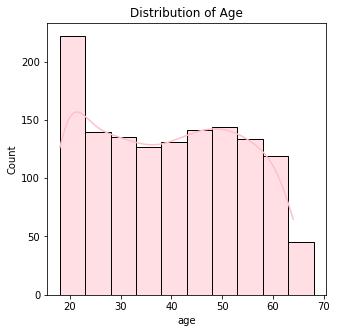

In [12]:
plt.figure(figsize=(5,5))
sns.histplot(data['age'],color='pink',binwidth=5,kde=True)
plt.title("Distribution of Age")
plt.show()


In [13]:
data.describe()

,age,bmi,children,expense
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Age doesn't follow a normal distribution but the way the data was collected in such way that equal represenation of each group might be possible so we nearly have equal count for all age groups with the bin width of 10 

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



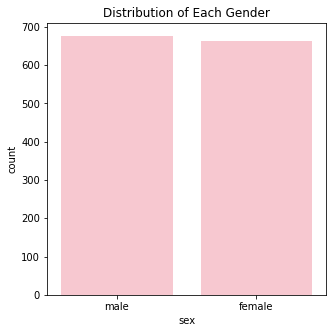

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data['sex'],color='pink')
plt.title("Distribution of Each Gender")
plt.show()


# SO HERE ALSO WE ARE ABLE TO THAT THE GENDER DISTRIBUTION IS EQUAL

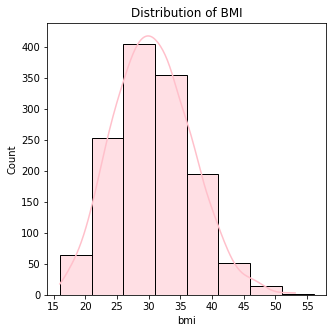

In [15]:
plt.figure(figsize=(5,5))
sns.histplot(data['bmi'],color='pink',binwidth=5,kde=True)
plt.title("Distribution of BMI")
plt.show()


# A PERFECT NORMAL CURVE WE HAVE GO FOR BMI WHICH INDICATES THAT SOME POPULATION IS FIT WHERE OTHER ARE NOT AS HEALTHLY AND ARE ON THE OBESE SIDE

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



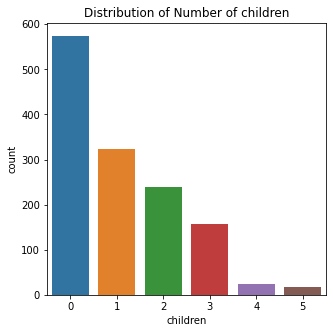

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data['children'])
plt.title("Distribution of Number of children")
plt.show()


# SO MOST PEOPLE IN THE DATASET HAVE 0 KIDS OR 1 KIDS 

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



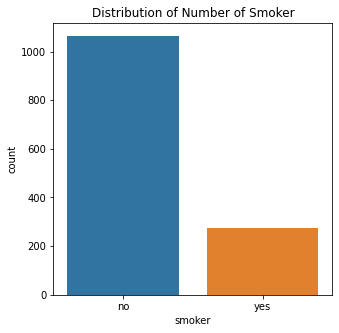

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(data['smoker'])
plt.title("Distribution of Number of Smoker")
plt.show()

# So most people in our dataset don't smoke 

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



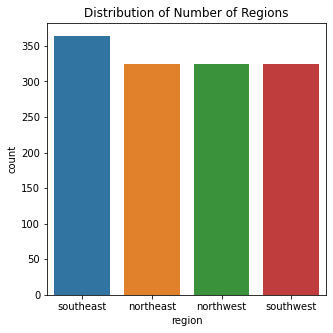

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(data['region'])
plt.title("Distribution of Number of Regions")
plt.show()

# SO HERE ALSO WE CAN FIND  OUT THAT THE PROCESS OF DATA COLLECTION WAS NEAT AND NO BIAS WAS THERE IN REGION SELECTION

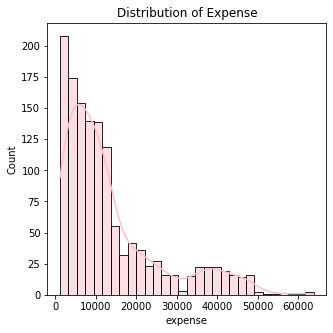

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(data['expense'],color='pink',kde=True)
plt.title("Distribution of Expense")
plt.show()


# SO HERE WE SEE THAT THE EXPENSE COLUMN IS LEFT SKEWED AND THIS IS SOMETHING TO PONDER ABOUT THIS IS VERY CLOSE TO REAL LIFE SINCE A LOT OF PEOPLE TEND HAVE LESS INSURANCE AND ONLY A HANDFUL OF THEM HAVE HIGH EXPENSE

In [20]:
lg.info("UNIVARIATE ANALYSIS DONE")

# MULTIVIRATE ANALYSIS

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,expense
0,20,male,31.1,2,no,southeast,2566.47
1,38,male,28.0,1,no,northeast,6067.13
2,51,male,31.6,0,no,northwest,9174.14
3,34,male,35.8,0,no,northwest,4320.41
4,64,female,36.0,0,no,southeast,14313.85


In [22]:
data.corr()

,age,bmi,children,expense
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expense,0.299008,0.198576,0.067998,1.000000


# HERE WE CAN SEE THAT OUR FEATURES (WHICH ARE CONTINIOUS IN NATURE ARE NON CORRELATED WHICH INDICATES THAT OUR DATA DOESN'T SUFFER FROM MULTICOLLINEARITY)

# AGE ,BMI AND EXPENSE ARE UNCORRELATED

In [23]:
data_1=data

In [24]:
data_1.head()

,age,sex,bmi,children,smoker,region,expense
0,20,male,31.1,2,no,southeast,2566.47
1,38,male,28.0,1,no,northeast,6067.13
2,51,male,31.6,0,no,northwest,9174.14
3,34,male,35.8,0,no,northwest,4320.41
4,64,female,36.0,0,no,southeast,14313.85


In [25]:
k=[]
for i in data.age:
    if i <=30:
        k.append("young")
    elif i <=50 and i >30:
        k.append("middle")
    else:
        k.append("old")


data_1['age_mapping']=k

In [26]:
data_1

,age,sex,bmi,children,smoker,region,expense,age_mapping
0,20,male,31.1,2,no,southeast,2566.47,young
1,38,male,28.0,1,no,northeast,6067.13,middle
2,51,male,31.6,0,no,northwest,9174.14,old
3,34,male,35.8,0,no,northwest,4320.41,middle
4,64,female,36.0,0,no,southeast,14313.85,old
...,...,...,...,...,...,...,...,...
1333,27,male,31.1,1,yes,southeast,34806.47,young
1334,53,male,36.1,1,no,southwest,10085.85,old
1335,48,female,31.1,0,no,southeast,8280.62,middle
1336,53,male,20.9,0,yes,southeast,21195.82,old


In [27]:

import scipy.stats as stats
dataset_table=pd.crosstab(data_1['sex'],data_1['age_mapping'])
print(dataset_table)

age_mapping  middle  old  young
sex                            
female          267  181    214
male            271  175    230


In [28]:
dataset_table.values 

array([[267, 181, 214],
       [271, 175, 230]], dtype=int64)

In [29]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[267 181 214]
 [271 175 230]]


In [30]:
val=stats.chi2_contingency(dataset_table)

In [31]:
Expected_Values=val[3]

In [32]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 2


In [33]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [34]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.2706236745391352


In [35]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 5.991464547107979


In [36]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.8734434969804927
Significance level:  0.05
Degree of Freedom:  2
p-value: 0.8734434969804927


In [37]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# Here we conlude that age and sex have  correlation

In [38]:

import scipy.stats as stats
dataset_table=pd.crosstab(data_1['children'],data_1['age_mapping'])
print(dataset_table)

age_mapping  middle  old  young
children                       
0               132  194    248
1               173   66     85
2               133   45     62
3                74   46     37
4                14    4      7
5                12    1      5


In [39]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[132 194 248]
 [173  66  85]
 [133  45  62]
 [ 74  46  37]
 [ 14   4   7]
 [ 12   1   5]]


In [40]:
val=stats.chi2_contingency(dataset_table)

In [41]:
Expected_Values=val[3]

In [42]:
no_of_rows=len(dataset_table.iloc[0:3,0])
no_of_columns=len(dataset_table.iloc[0,0:5])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 4


In [43]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [44]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)

In [45]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

In [46]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# children and age are also correlated

In [47]:
data_1.head()

,age,sex,bmi,children,smoker,region,expense,age_mapping
0,20,male,31.1,2,no,southeast,2566.47,young
1,38,male,28.0,1,no,northeast,6067.13,middle
2,51,male,31.6,0,no,northwest,9174.14,old
3,34,male,35.8,0,no,northwest,4320.41,middle
4,64,female,36.0,0,no,southeast,14313.85,old


C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



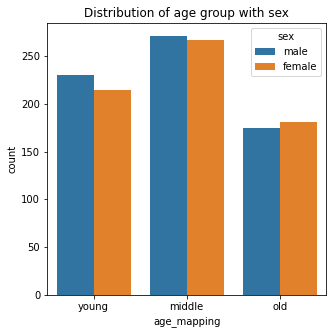

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(data_1['age_mapping'],hue=data_1['sex'])
plt.title("Distribution of age group with sex")
plt.show()

# The correlation which came chi square test is beacause old people in this dataset are less since majority population is under 50

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



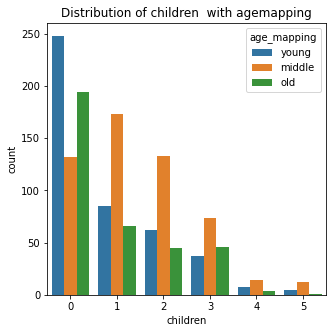

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(data_1['children'],hue=data_1['age_mapping'])
plt.title("Distribution of children  with agemapping")
plt.show()

In [52]:
data.head()

,age,sex,bmi,children,smoker,region,expense,age_mapping
0,20,male,31.1,2,no,southeast,2566.47,young
1,38,male,28.0,1,no,northeast,6067.13,middle
2,51,male,31.6,0,no,northwest,9174.14,old
3,34,male,35.8,0,no,northwest,4320.41,middle
4,64,female,36.0,0,no,southeast,14313.85,old


# Here clearly you can see that a lot of people don't have any children so this explains the correlation with agemapping and children

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



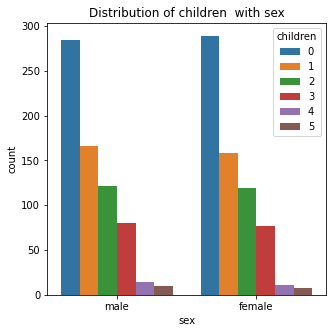

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(data_1['sex'],hue=data_1['children'])
plt.title("Distribution of children  with sex")
plt.show()

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



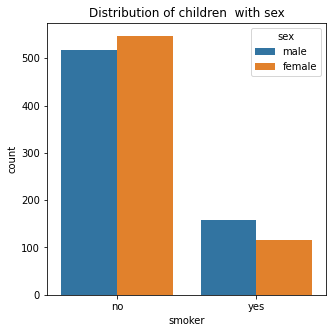

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(data_1['smoker'],hue=data_1['sex'])
plt.title("Distribution of children  with sex")
plt.show()

# No association can be seen between sex and children

In [53]:
data.head()

,age,sex,bmi,children,smoker,region,expense,age_mapping
0,20,male,31.1,2,no,southeast,2566.47,young
1,38,male,28.0,1,no,northeast,6067.13,middle
2,51,male,31.6,0,no,northwest,9174.14,old
3,34,male,35.8,0,no,northwest,4320.41,middle
4,64,female,36.0,0,no,southeast,14313.85,old


C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



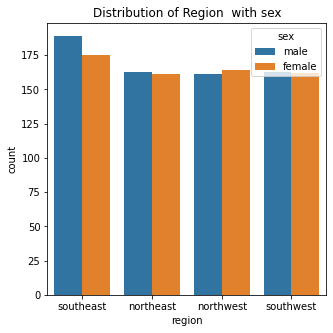

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(data_1['region'],hue=data_1['sex'])
plt.title("Distribution of Region  with sex")
plt.show()

# AGAIN WE CAN SEE THAT A VERY FINE DISTRIBUTION OF THE DATA CAN BE SEEN AND NO ASSCOCIATION BETWEEM REGION AND SEX

C:\Users\aditya\anaconda3\envs\cas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



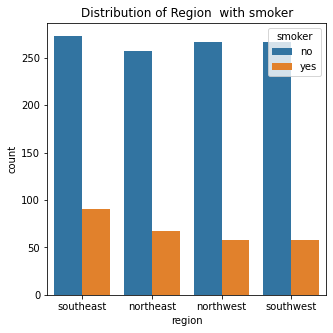

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(data_1['region'],hue=data_1['smoker'])
plt.title("Distribution of Region  with smoker")
plt.show()

# NO SHARP INSIGHT CAN BE DRAWN WHAT IS CLEAR THAT THE DATA COLLECTION PROCESS HAS BEEN VERY SMOOTH 

<Figure size 360x360 with 0 Axes>

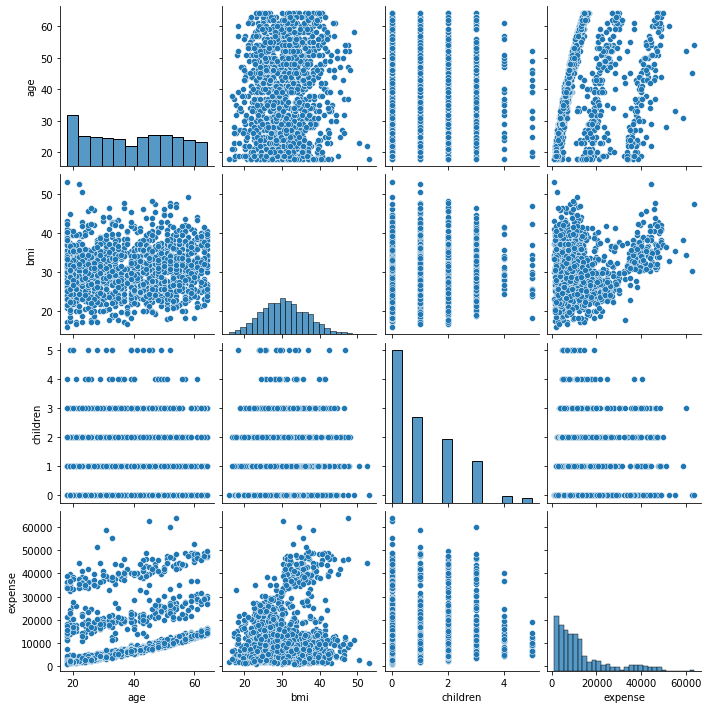

In [56]:
plt.figure(figsize=(5,5))
sns.pairplot(data)
plt.show()

In [57]:
lg.info("MULTIVARIATE ANALYSIS HAS BEEN DONE")